In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

print("Library berhasil dimuat.")

Library berhasil dimuat.


In [2]:
# Load gambar
img1 = cv2.imread('/kaggle/input/gambar-buku/gambar buku/WhatsApp Image 2026-02-14 at 20.12.29 (1).jpeg') # Gambar referensi (tegak)
img2 = cv2.imread('/kaggle/input/gambar-buku/gambar buku/WhatsApp Image 2026-02-14 at 20.12.29.jpeg') # Gambar target (miring)

# Konversi ke Grayscale untuk pemrosesan SIFT
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

print("Gambar berhasil dimuat dan dikonversi ke grayscale.")

Gambar berhasil dimuat dan dikonversi ke grayscale.


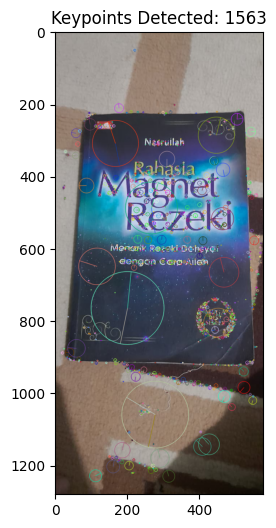

In [3]:
# Inisialisasi SIFT detector
sift = cv2.SIFT_create()

# Deteksi keypoints dan descriptors
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

# Visualisasi Keypoints pada gambar pertama
img_kp1 = cv2.drawKeypoints(img1, kp1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(img_kp1, cv2.COLOR_BGR2RGB))
plt.title(f'Keypoints Detected: {len(kp1)}')
plt.show()

In [4]:
# Menggunakan Brute-Force Matcher dengan L2 Norm
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Lowe's Ratio Test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

print(f"Jumlah pasangan fitur yang cocok: {len(good_matches)}")

Jumlah pasangan fitur yang cocok: 541


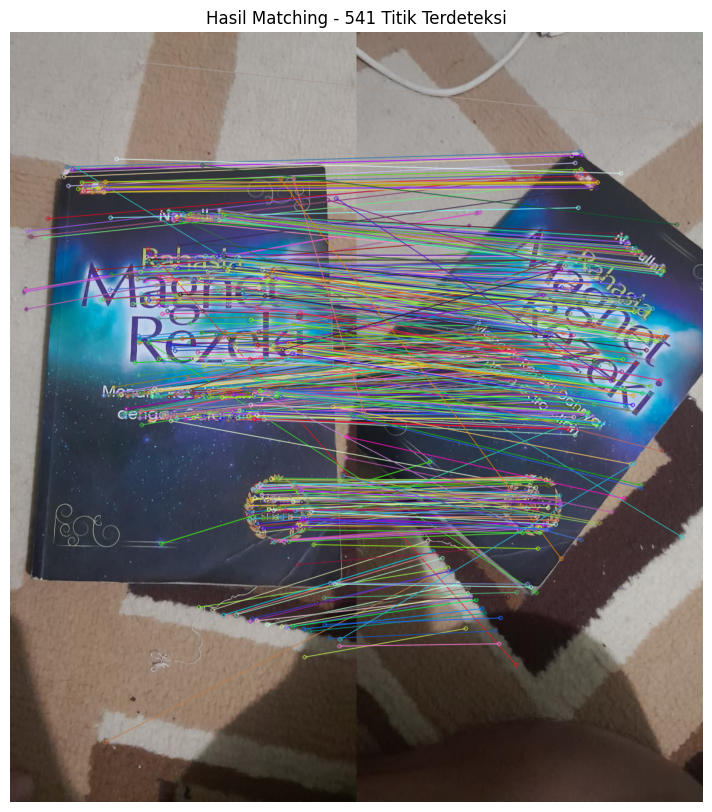

True

In [5]:
# Menggambar hasil matching
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, 
                              flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Tampilkan Hasil
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
plt.title(f'Hasil Matching - {len(good_matches)} Titik Terdeteksi')
plt.axis('off')
plt.show()

# Simpan untuk lampiran laporan
cv2.imwrite('hasil_matching_final.jpg', img_matches)